# Associazione tra Variabili

Abbiamo finora analizzato campioni "univariati", ovvero composti di una sola variabile. Più precisamente, anche quando diverse variabili erano disponibili, abbiamo analizzato le variabili ad una ad una. In pratica, capita spesso che le osservazioni sotto analisi siano costituite da più variabili. In questi casi è utile considerare dei metodi per descrivere e visualizzare i dati in maniera "multivariata", in modo da studiare le interazioni tra i vari fattori che descrivono il fenomeno in analisi. 

Utilizzeremo come esempio nuovamente il dataset Titanic:

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Dato il dataset sopra, potremmo chiederci se delle variabili influenzano i valori di altre. Ad esempio, trovarsi in prima, seconda o terza classe (variabile `Pclass`) influenza in qualche modo la probabilità di sopravvivere (variabile `Survived`)?, o ancora, l'età (variabile `Age`) o il prezzo pagato (`Fare`) influenza in qualche modo la probabilità di salvarsi (`Survived`)?

In questa lezione, vedremo diversi modi per riassumere le distribuzioni di due variabili e verificare eventuali associazioni (o correlazioni) tra le variabili.

## Tabelle di contingenza e probabilità

Se entrambe le variabili che stiamo studiando sono discrete, possiamo enumerare tutte le possibili combinazioni di valori e riassumerle in una **tabella di contingenza** che indica i valori di una variabile sulle righe e quelli dell'altra variabile sulle colonne. Ogni cella indicherà il numero di volte in cui osserviamo una data coppia di valori.

La tabella di contingenza per le variabili `Sex` e `Pclass` avrà questo aspetto:

In [10]:
pd.crosstab(titanic['Sex'], titanic['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


La tabella sopra indica ad esempio che $94$ passeggeri in classe $1$ erano di sesso femminile. Una tabella di contingenza è spesso mostrata con dei valori a margine che mostrano le somme di righe e colonne:

In [11]:
pd.crosstab(titanic['Sex'], titanic['Pclass'],margins=True)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


Si noti che i valori "All" indicano le frequenze assolute delle due variabili, mentre il valore in basso a destra indica la numerosità del campione.

A partire dalla tabella di contingenza, è possibile ragionare in termini dei vari concetti che abbiamo visto quando abbiamo parlato di probabilità nel caso di variabili discrete, e in particolare di:
* Joint Probability Distributions (o distribuzioni di frequenze/probabilità congiunte)
* Marginal Probability Distributions (o distribuzioni di frequenze/probabilità marginali)
* Conditional Probability Distributions (o distribuzioni di frequenze/probabilità condizionali)

Vediamo qualche esempio:

### Joint Probability Distributions

In [12]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=True)

Pclass,1,2,3
Sex,,,
female,0.105499,0.085297,0.161616
male,0.136925,0.121212,0.389450


### Marginal Probability Distributions

In [13]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=True, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.105499,0.085297,0.161616,0.352413
male,0.136925,0.121212,0.389450,0.647587
All,0.242424,0.206510,0.551066,1.000000


Le marginali sono riportate nell'ultima riga e ultima colonna.

### Conditional Probability Distributions

Probabilità condizionate rispetto alla variabile `Sex` (ottenute dividendo i valori della tabella di contingenza per le somme dei valori sulle righe - colonna `All`):

In [15]:
#normalize=0 indica di condizionare rispetto alla prima variabile
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=0, margins=True)

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386
All,0.242424,0.206510,0.551066


Si noti che nella tabella sopra non sono riportati valori a margine delle righe, in quanto questi sarebbero tutti uguali a 1.

Dalla tabella sopra, posso evincere:

* $P(Pclass=1|Sex=female) = 0.290363 = \frac{94}{314}$
* $P(Pclass=2|Sex=female) = 0.242038 = \frac{76}{314}$
* $P(Pclass=3|Sex=female) = 0.458599 = \frac{144}{314}$
* $P(Pclass=1|Sex=male) = 0.211438 = \frac{122}{577}$
* $P(Pclass=2|Sex=male) = 0.187175 = \frac{108}{577}$
* $P(Pclass=3|Sex=male) = 0.601386 = \frac{347}{577}$

Dalla tabella, notiamo che la distribuzione dei passeggeri cambia nelle tre classi. In particolare, tra gli uomini, la terza classe è più frequente che tra le donne. 

Possiamo ottenere la prospettiva complementare condizionando rispetto alla classe invece:

In [16]:
#normalize=1 indica di condizionare rispetto alla prima variabile
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=1, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.435185,0.413043,0.293279,0.352413
male,0.564815,0.586957,0.706721,0.647587


Si noti che nella tabella sopra non sono riportati valori a margine delle colonne, in quanto questi sarebbero tutti uguali a 1.

In questo caso, ogni colonna sarà una distribuzione di probabilità. Ad esempio:

* $P(Sex=female|Pclass=1) = 0.435185$
* $P(Sex=male|Pclass=1) = 0.564815$

Notiamo che le proporzione tra uomini e donne cambiano nelle tre classi e in particolare nella terza classe ci sono molti più uomini che donne.

## Rappresentazioni Grafiche
Possiamo facilmente ottenere rappresentazioni grafiche delle relazioni tra due variabili mediante grafici a barre, direttamente dalle tabelle di contingenza. Ad esempio, il seguente grafico confronta le frequenze congiunte assolute:

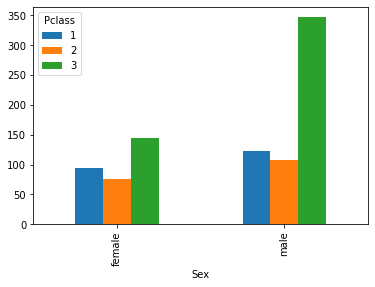

In [3]:
pd.crosstab(titanic['Sex'], titanic['Pclass']).plot.bar()
plt.show()

Da qui notiamo che molti passeggeri sono uomini e in terza classe. In questi casi, può essere a volte utile uno stacked plot:

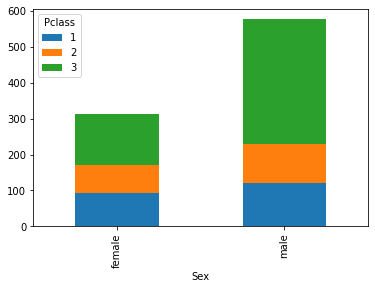

In [4]:
pd.crosstab(titanic['Sex'], titanic['Pclass']).plot.bar(stacked=True)
plt.show()

È spesso utile visualizzare le distribuzioni condizionate. Ad esempio, il grafico che segue ci permette di confrontare le distribuzioni dei passeggeri nelle tre classi, suddividendo in due gruppi sulla base del sesso:

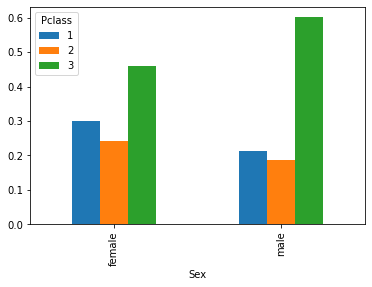

In [5]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=0).plot.bar()
plt.show()

Anche in questi casi possiamo usare uno stacked plot:

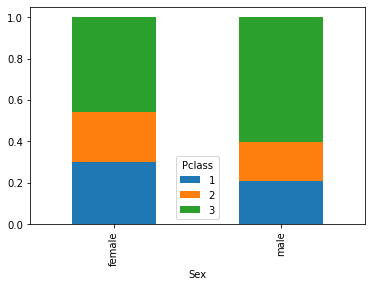

In [6]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=0).plot.bar(stacked=True)
plt.show()

Analogamente, possiamo ottenere i grafici delle frequenze condizionate rispetto alle classi:

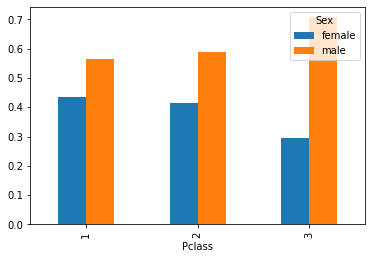

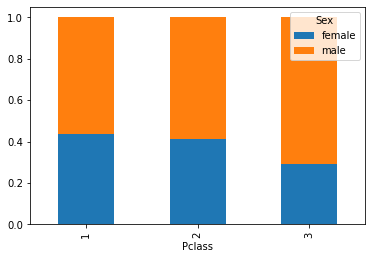

In [7]:
#normalize=1 indica di condizionare rispetto alla prima variabile
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=1).T.plot.bar()
#normalize=1 indica di condizionare rispetto alla prima variabile
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=1).T.plot.bar(stacked=True)
plt.show()

## Misure di Associazione tra due Variabili Discrete

Vediamo adesso delle misure che ci permettono di stimare se due variabili sono o meno "associate", ovvero fino a che punto i valori di una variabile influenzano quelli dell'altra. Abbiamo visto che le variabili `Sex` e `Pclass` sembrano avere un qualche grado di associazione. Vediamo adesso un caso di associazione più forte, esplorando la relazione tra `Pclass` e `Survived`.

Consideriamo tre distribuzioni di frequenze relative di `Survived` condizionando rispetto ai valori `Pclass`:
* f(Survived|Pclass=1)
* f(Survived|Pclass=2)
* f(Survived|Pclass=3)

La tabella delle frequenze condizionate che segue riassume questi valori

In [22]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize=0)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Dai numeri vediamo che le distribuzioni sono molto diverse, a seconda del condizionamento operato. Ciò non è soprendente, perché immaginiamo che i passeggeri in prima e seconda classe abbiano avuto un trattamento diverso rispetto a quelli in terza classe.

Visualizziamo le distribuzioni graficamente:

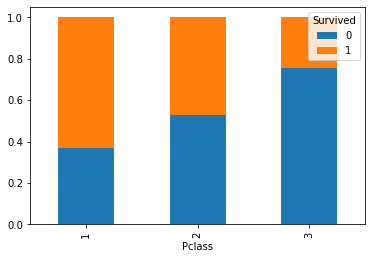

In [8]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize=0).plot.bar(stacked=True)
plt.show()

Il grafico mostra chiaramente lo sbilanciamento, per cui deduciamo che `Pclass` e `Survived` sono in effetti **associate** (o **correlate**).

### Indipendenza e Frequenze Attese
Prima di procedere con l'illustrare alcune misure di associazione tra variabili, dobbiamo parlare del concetto di **indipendenza**, che è opposto a quello di associazione. 

Due variabili si dicono indipendenti se l'osservazione di una variabile non ci permette di fare nessun tipo di predizione sui possibili valori dell'altra variabile.

Immaginiamo due persone scelte a caso che vivono in parti diverse del mondo scelte casualmente. Se osserviamo il modo in cui una di queste due persone si veste, questa osservazione non ci dirà nulla sul modo in cui l'altra potrebbe vestirsi. Le variabili "vestiti della prima persona" e "vestiti della seconda persona" sono indipendenti. La stessa cosa non vale se le persone abitano nella stessa città. In tal caso, se piove, ad esempio, ci aspettiamo che le due persone indossino abiti simili, per cui osservare il modo in cui una delle due persone si veste può dirci qualcosa sul modo in cui si vestirà l'altra.

Consideriamo nuovamente la generica tabella di contingenza:

|             | X=$x_1$        | X=$x_2$ | ... | X=$x_l$ | Total   |
|-------------|------------|------------|---------|-|-|
| Y=$y_1$     | $n_{11}$  | $n_{12}$  | ... | $n_{1l}$ | $n_{1+}$ |
| Y=$y_2$     | $n_{21}$  | $n_{22}$  | ... | $n_{2l}$ | $n_{2+}$ |
| ...     | ... | ... | ... | ...| ...| ...|
| Y=$y_k$     | $n_{k1}$  | $n_{k2}$  | ... | $n_{kl}$ | $n_{k+}$ |
| Total       | $n_{+1}$  | $n_{+2}$ | ... |  $n_{+l}$  | $n$ |

Adesso supponiamo di non poter osservare le co-occorrenze, ma di poter osservare solo i valori marginali:

|             | X=$x_1$        | X=$x_2$ | ... | X=$x_l$ | Total   |
|-------------|------------|------------|---------|-|-|
| Y=$y_1$     |   |   | ... |  | $n_{1+}$ |
| Y=$y_2$     |   |  | ... |  | $n_{2+}$ |
| ...     | ... | ... | ... | ...| ...| ...|
| Y=$y_k$     |   |   | ... | | $n_{k+}$ |
| Total       | $n_{+1}$  | $n_{+2}$ | ... |  $n_{+l}$  | $n$ |

Supponiamo adesso di dover "ricostruire" i valori mancanti. Se le due variabili sono indipendenti, allora:

$$P(X=x_j, Y=y_i) = P(X=x_j) P(Y=y_i)$$

Ricordiamo che:

$$P(X=x_j) = \frac{n_{+j}}{n}, P(Y=y_i) = \frac{n_{i+}}{n}, P(X=x_j, Y=y_i)=\frac{n_{ij}}{n}$$

Da qui otteniamo che:

$$\tilde n_{ij} = n \cdot P(X=x_j,Y=y_i) = n \cdot P(X=x_j) \cdot P(Y=y_i) = n \cdot \frac{n_{+j}}{n} \frac{n_{i+}}{n} = \frac{n_{+j}n_{i+}}{n}$$

Da cui:

$$\tilde n_{ij} = P(X=x_j) n_{i+} = P(Y=y_i) n_{+j}$$

Dove la tilde su $\tilde n_{ij}$ indica che questo è un valore stimato, non il valore realmente osservato.

> Quanto visto sopra suggerisce che le frequenze $n_{ij}$ seguando la stessa distribuzione delle frequenze marginali in caso di indipendenza tra le variabili.

#### Esempio
Vediamo un esempio sulla nostra tabella di contingenza che mette in relazione `Pclass` e `Survived`:

In [24]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


La probabilità marginale $P(Survived)$ è data da:

In [25]:
titanic['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Queste sono le probabilità $P(Survived=0)$ e $P(Survived=1)$.

Se le due variabili non fossero correlate, ci aspetteremmo di avere delle frequenze assolute proporzionali alle probabilità marginali:

$$\tilde{n}_{ij} = P(Y=y_j) \cdot n_{i+}$$

Questi valori saranno dati dalla seguente tabella:

In [26]:
f_ij = titanic['Survived'].value_counts(normalize=True).values
n_iplus = titanic['Pclass'].value_counts().sort_index().values.reshape(-1,1)

tab = f_ij*n_iplus
ct = pd.crosstab(titanic['Pclass'], titanic['Survived'], margins=True).astype(float)
ct.values[:-1,:-1] = tab[...]
ct

Survived,0,1,All
Pclass,,,
1,133.090909,82.909091,216.0
2,113.373737,70.626263,184.0
3,302.535354,188.464646,491.0
All,549.000000,342.000000,891.0


Confrontando queste frequenze con le frequenze effettive, ci accorgiamo che esistono delle discrepanze, ragionevolmente dovute al fatto che le variabili non sono in effetti indipendenti.

### Statistica $\mathcal{X}^2$ di Pearson
La statistica $\mathcal{X}^2$ di Pearson misura queste discrepanze con la seguente formula:

$$\mathcal{X}^2 = \sum_{i=1}^k \sum_{j=1}^l \frac{(n_{ij}-\tilde{n}_{ij})^2}{\tilde{n}_{ij}}$$

La formula sopra calcola le differenze tra le frequenze assolute osservate e attese al quadrato (per eliminare segni negativi) e scala il risultato per le frequenze attese. **Scalare il risultato fa si che piccole discrepanze ottenute su frequenze attese piccole pesino di più di piccole discrepanze ottenute tra frequenze attese grandi.**

Si noti che se le frequenze attese sono identiche a quelle osservate, la statistica ottiene un valore pari a zero.

Nell'esempio visto in precedenza, il risultato sarà pari a:

In [28]:
n_ij_pred = f_ij*n_iplus
n_ij = pd.crosstab(titanic['Pclass'], titanic['Survived']).values

chi_square = ((n_ij-n_ij_pred)**2/n_ij_pred).sum()
print(f"{chi_square:0.5}")

102.89


### Statistica $V$ di Cramer
La statistica $\mathcal{X}^2$ di Pearson non è normalizzata, nel senso che il suo valore massimo dipende dalla dimensione del campione. Per ovviare a questo problema, si può usare la statistica V di Cramer, definita come segue:

$$V = \sqrt{\frac{\mathcal{X}^2}{n(min(k,l)-1)}}$$

Il risultato sarà un valore compreso tra $0$ e $1$.

La statistica V di Cramer sarà pari al seguente valore per l'esempio visto prima:

In [29]:
from scipy.stats.contingency import association

print(f"{association(pd.crosstab(titanic['Pclass'], titanic['Survived'])):0.2f}")

0.34


Questo valore indica una piccola associazione tra le due variabili, perché il valore è maggiore di $0$ ma comunque non prossimo a $1$.

### Rischio Relativo

Il rischio relativo è uno dei metodi di misurazione del grado di correlazione tra due variabili discrete più diffuso in epidemiologia. 

Vediamo un esempio (da [qui](https://en.wikipedia.org/wiki/Odds_ratio)): supponiamo che in un villaggio di $1000$ persone sia aumentata l'incidenza di una malattia rara. Investigando, scopriamo che recentemente una parte della popolazione è stata esposta a una radiazione.

I dati relativi a soggetti malati e sani esposti o non esposti al rischio (la radiazione) viene riassunta dalla seguente tabella di contingenza che mette in relazione la variabile "Diseased/Healthy" con quella "Exposed/Non Exposed":

In [30]:
contingency = pd.DataFrame({
    "Exposed": [20, 380],
    "Non Exposed": [6,594]
}, index=["Diseased", "Healthy"])
contingency

,Exposed,Non Exposed
Diseased,20,6
Healthy,380,594


La tabella indica il numero di persone che hanno contratto una data malattia o meno in relazione al fatto che siano stati esposti a un determinato rischio o meno (es. a un elemento inquinante).

Il rischio di sviluppare la malattia se esposti può essere calcolato con la seguente probabilità:

$$P(Diseased|Exposed) = \frac{\#\ (Diseased, Exposed)}{\#\ Exposed} = \frac{20}{20+380} = 0.05$$

Vediamo che abbiamo un rischio del $5\%$ di sviluppare la malattia, se esposti alla radiazione. Ad esempio, tra $100$ persone esposte al rischio, ci aspettiamo di trovarne $5$ malate.

Il rischio calcolato sopra, da solo, non ci dice molto sull'associazione tra le variabili "Exposed" e "Non Exposed". Consideriamo adesso la probabilità di contrarre la malattia se non esposti al rischio:

$$P(Diseased|Non\ Exposed) = \frac{\#\ (Diseased, Non\ Exposed)}{\#\ Non\ Exposed} = \frac{6}{6+594} = 0.01$$

Questo valore ci dice che abbiamo un rischio di circa l'$1\%$ di contrarre la malattia se non esposti. In pratica, su $100$ soggetti non esposti al rischio, $1$ si ammala.

È utile mettere a confronto questi due valori di rischio. Infatti, sebbene il $5\%$ di rischio di ammalarsi tra i soggetti esposti non sia in valore assoluto un numero molto alto, va anche detto che la proporzione di soggetti malati non esposti al rischio è molto più bassa ($1\%$). Definiamo dunque il rischio relativo come il rapporto tra questi due rischi (o probabilità):

$$\textit{RR} = \frac{P(Diseased|Exposed)}{P(Diseased|Non\ Exposed)} = \frac{\frac{\#\ (Diseased, Exposed)}{\#\ Exposed}}{\frac{\#\ (Diseased, Non\ Exposed)}{\#\ Non\ Exposed}} = \frac{0.05}{0.1}=5$$

Interpretiamo questo valore così:

> La proporzione di soggetti che contraggono la malattia è di $5$ volte più grande tra coloro che sono stati esposti al rischio, rispetto al gruppo di coloro che non lo sono stati.

Ad esempio, se tra $100$ persone non esposte al rischio, generalmente $10$ si ammalano (rischio del $10\%$), allora ci aspettiamo che tra $100$ persone esposte al rischio, ben il $50\%$ si ammali!

Il rischio relativo non ci dice nulla sul rischio assoluto (la proporzione di persone che si ammala), ma solo su quanto osservare soggetti esposti al rischio, rispetto a osservare soggetti non esposti al rischio possa influenzare la proporzione di soggetti malati.

In genere:
* $RR=1$ indica che l'esposizione al rischio è ininfluente nello sviluppo della malattia (le variabili sono indipendenti);
* $RR>1$ indica che l'esposizione al rischio è associata positivamente allo sviluppo della malattia (ci sono più malati tra i soggetti esposti al rischio);
* $RR<1$ indica che l'esposizione al rischio è associata negativamente allo sviluppo della malattia (ci sono meno malati tra i soggetti esposti al rishcio). In questo caso si dice che il rischio "protegge" dalla comparsa della malattia (utile se il "rischio" è in realtà l'assunzione di un farmaco).

**Attenzione al fatto che il rischio relativo misura una correlazione tra variabili, non un rapporto di causa-effetto, quindi non è sempre corretto dire che un in presenza di un rischio relativo maggiore di 1, allora l'esposizione al rischio "causa" la malattia. Esistono però degli strumenti (analisi causale) che ci permettono di verificare in quali casi possiamo dare questa interpretazione. Questi strumenti sono fondamentali per poter appurare se un determinato farmaco causa (o è co-responsabile di) una guarigione o se una determinata abitudine (es. il fumo) causa (o è co-responsabile della) comparsa di una malattia. Vedremo meglio qualche esempio più in là nel corso.**

### Odds Ratio

Il rischio relativo non è sempre calcolabile. Infatti, nel caso precedente abbiamo assunto di avere a disposizione tutti i dati sulla popolazione: di tutti i $1000$ abitanti sapevamo chi era stato esposto al rischio e chi no e chi aveva sviluppato la malattia e chi no. In molti casi, potremmo non avere tutti questi dati. Ad esempio, immaginiamo che l'incidente sia avvenuto $50$ fa e che ai tempi sia stato intervistato solo un campione casuale del $50\%$ dei $1000$ abitanti del villaggio. Immaginiamo di aver ottenere la seguente tabella di contingenza:

In [31]:
contingency2 = pd.DataFrame({
    "Exposed": [20, 10],
    "Non Exposed": [6,16]
}, index=["Diseased", "Healthy"])
contingency2

,Exposed,Non Exposed
Diseased,20,6
Healthy,10,16


Si noti che questo caso (quello del campionamento) sarà il più frequente, in quanto spesso non abbiamo accesso a tutta la popolazione, ma solo a un campione.

In questo caso, non possiamo calcolare il rischio relativo in quanto non sono disponibili i numeri reali di persone esposte e non esposte al rischio, che stavano al denominatore delle espressioni del calcolo del rischio. Se applichiamo comunque la formula, otterremo una stima falsata dal nostro campionamento:

$$\textit{RR} = \frac{f(Diseased|Exposed)}{f(Diseased|Non\ Exposed)} = \frac{\frac{\#\ (Diseased, Exposed)}{\#\ Exposed}}{\frac{\#\ (Diseased, Non\ Exposed)}{\#\ Non\ Exposed}} = \frac{20/(20+10)}{6/(6+16)}=2.45$$

Sebbene non possiamo calcolare il rischio relativo in quanto non conosciamo il numero assoluto di persone malate e esposte, **ci aspettiamo che il nostro campione sia una buona rappresentazione della popolazione**, per cui possiamo ragionare in termini di "odds".

Gli odds sono un concetto di probabilità molto usato nell'ambito delle scommesse, perché permettono allo scommettitore di calcolare in modo facile la vinciata da incassare. Ad esempio, se la vittoria della squadra $A$ sulla squadra $B$ in una partita di calcio è data $5:1$, il bookmaker si aspetta che sia $5$ volte più probabile che vinca la squadra $A$ rispetto alla $B$. Se scometto la cifra di $2$ euro sulla squadra $B$ e la squadra $B$ vince, allora vincerò $5\times 2 = 10$ euro (ho scomesso su un evento raro). L'odd in questo caso sarebbe definito come:

$$odd = \frac{5}{1} = 5$$

Alternativamente, posso ragionare in termini di probabilità. Visto lo schema sopra, mi aspetto che, se giocassimo la partita $100$ volte, allora la probabilità di vittorie per la squadra $A$ sarebbe pari a $P(A\ vince)=\frac{5}{5+1}$, mentre la probabilità di sconfitta sarebbe pari a $P(A\ perde)=\frac{1}{5+1}$. L'odd può essere definito in termini di queste probabilità:

$$odd = \frac{P(A\ vince)}{P(A\ perde)} = \frac{\frac{5}{5+1}}{\frac{1}{5+1}} = 5$$

In generale, l'odd per un evento $E$ è la probabilità che l'evento accade, fratto la probabilità che l'evento non accada:

$$odd = \frac{P(E)}{1-P(E)}$$

L'odd è un concetto simile a quello del rischio perché ci dice quanto è più grande la frequenza che un evento si realizzi (A vince) rispetto alla frequenza che l'evento non si realizzi. Applichiamo questo concetto al nostro esempio. Definiamo due odds (così come abbiamo definito due rischi):

* L'odds di ammalarsi se esposti: $\frac{P(Diseased|Exposed)}{P(Healthy|Exposed)} = \frac{\frac{20}{20+10}}{\frac{10}{20+10}} = \frac{20}{10} = 2$
* L'odds di ammalarsi se non esposti: $\frac{P(Diseased|Non\ Exposed)}{P(Healthy|Non\ Exposed)} = \frac{\frac{6}{6+16}}{\frac{16}{6+16}} = \frac{6}{16} 0.375$

Va notato che nelle formule sopra i conteggi assoluti, ovvero quelli di cui non ci fidiamo dato il campionamento, "si annullano".

L'odds ratio sarà definito come segue:

$$odd = \frac{\frac{f(Diseased|Exposed)}{f(Healthy|Exposed)}}{\frac{f(Diseased|Non\ Exposed)}{f(Healthy|Non\ Exposed)}} = \frac{2}{0.375} \approx 5.3$$

Notiamo come l'odds ratio ottenuto sia molto vicino al rischio relativo calolcato in precedenza $5$. **In pratica si può dimostrare che, se si assume che la malattia sia rara (rare-disease assumption), l'odds ratio e il rischio relativo convergono a volori simili.** È quindi una pratica abbastanza comune di effettuare questa ipotesi e calcolare l'odds ratio al posto del rischio relativo.

## Associazioni tra Variabili Continue

Quando le variabili sono continue, non è più possibile costruire tabelle di contingenza. In quei casi, si utilizzano altri strumenti, che vedremo in questa sezione.

Considereremo il dataset "diabetes" per questa parte. Il dataset è stato introdotto nel $1979$ da Reaven e Miller ed esamina la relazione tra misure del sangue e l'insulina in $145$ adulti:

In [9]:
from statsmodels.datasets import get_rdataset
data = get_rdataset('Diabetes','heplots').data
data

,relwt,glufast,glutest,instest,sspg,group
0,0.81,80,356,124,55,Normal
1,0.95,97,289,117,76,Normal
2,0.94,105,319,143,105,Normal
3,1.04,90,356,199,108,Normal
4,1.00,90,323,240,143,Normal
...,...,...,...,...,...,...
140,1.05,353,1428,41,480,Overt_Diabetic
141,0.91,180,923,77,150,Overt_Diabetic
142,0.90,213,1025,29,209,Overt_Diabetic
143,1.11,328,1246,124,442,Overt_Diabetic


Le $6$ variabili hanno i seguenti significati:

*   ``relwt``
      relative weight, expressed as the ratio of actual weight to
      expected weight, given the person's height, a numeric vector

*   ``glufast``
      fasting plasma glucose level, a numeric vector

*   ``glutest``
      test plasma glucose level, a measure of glucose intolerance, a
      numeric vector

*   ``instest``
      plasma insulin during test, a measure of insulin response to oral
      glucose, a numeric vector

*   ``sspg``
      steady state plasma glucose, a measure of insulin resistance, a
      numeric vector

*   ``group``
      diagnostic group, a factor with levels ``Normal``
      ``Chemical_Diabetic`` ``Overt_Diabetic``

### Rappresentazione grafica di due variabili continue
Iniziamo considerando le variabili `sspg` e `glutest`. La prima forma di rappresentazione utile è quella dello scatterplot, che visualizza le osservazioni come dati bidimensionali:


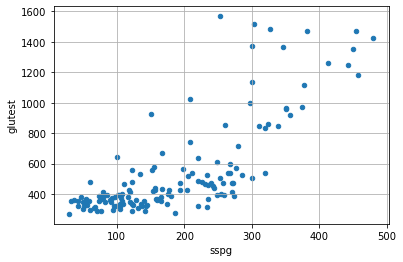

In [33]:
from matplotlib import pyplot as plt
data.plot.scatter(x='sspg',y='glutest')
plt.grid()

Notiamo che, sembra esserci una relazione tra le due variabili. Infatti, al crescere di `sspg`, i valori di `glutest` tendono a crescere. Sembra esserci una **correlazione** (o **associazione**) positiva. Prendiamo adesso la coppia `relwt` e `sspg`:

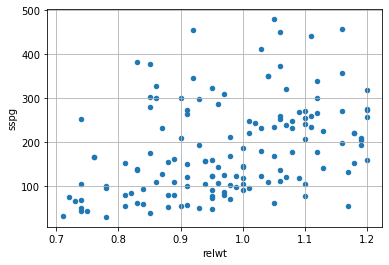

In [34]:
data.plot.scatter(x='relwt',y='sspg')
plt.grid()

Notiamo che in questo caso la relazione appare meno marcata, ma notiamo comunque un trend ascendente di `sspg` al crescere di `relwt`. È spesso utile cercare studiare le correlazioni con una **scattermatrix** che mostra tutti i possibili scatterplot. Nel caso del nostro esempio:

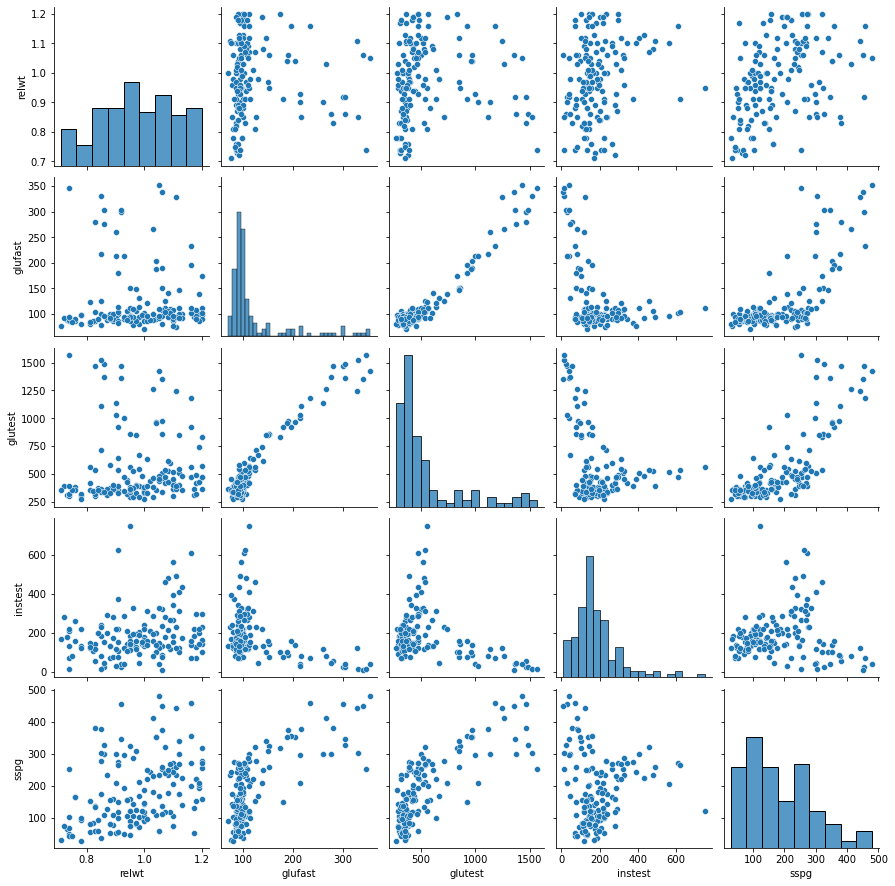

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.show()

Dalla visualizzazione sopra, possiamo dedurre alcune cose:
* alcune coppie di variabili sono correlate positivamente (ad esempio `relwt`-`sspg`), mentre altre lo sono negativamente (`glutest`-`instest`);
* alcune relazioni sono "lineari" (ad esempio `glutest` e `glufast`), mentre altre tengono a non esserlo (ad esempio `glufast` e `sspg`):
* alcune coppie di variabili (ad esempio `sspg` e `relwt`) non sembrano essere correlate.

### Covarianza
Abbiamo visto che la **varianza** indica quanto un campione univariato sia disperso attorno alla sua media. Possiamo utilizzare un'idea simile per quantificare fino a che punto **due variabili si distribuiscono in modo simile attorno alla loro media**. Ci aspettiamo che, se le variabili sono correlate, allora si distribuiranno in maniera simile. 

Il concetto di **varianza** viene generalizzato dal concetto di **covarianza** nel caso di dati bivariati. La covarianza misura quanto le due variabili varino assieme e si misura come segue:

$$
Cov(X,Y) = \frac{1}{n}\sum_i^n (x^{(i)} - \overline x) (y^{(i)} - \overline y)
$$

dove $X$ e $Y$ sono le due variabili di interesse, $x^{(i)}$ è il valore di $X$ per l'iesima osservazione, $y^{(i)}$ è il valore di $Y$ per l'iesima osservazione e $\overline x$, $\overline y$ sono le medie delle osservazioni per le due variabili $X$ e $Y$.

I principali "attori" nella formula sopra sono i termini:

* $(x^{(i)}-\overline x)$: misura la distanza tra un punto $x^{(i)}$ e la rispettiva media $\overline x$. Se il valore del punto in considerazione è sopra la media, allora questa differenza sarà positiva, altrimenti negativa.
* $(y^{(i)}-\overline y)$: misura la distanza tra un punto $y^{(i)}$ e la rispettiva media $\overline y$. Se il valore del punto in considerazione è sopra la media, allora questa differenza sarà positiva, altrimenti negativa.

Ogni termine della somma nella formula della covarianza effettua i prodotti tra questi due termini:

$$(x^{(i)}-\overline x)(y^{(i)}-\overline y)$$

Che saranno:
* **positivi** se gli elementi $x^{(i)}$ e $y^{(i)}$ sono "concordi", ovvero se sono entrambi sopra le rispettive medie o entrambi sotto le rispettive medie;
* **negativi** se gli elementi $x^{(i)}$ e $y^{(i)}$ sono "discordi", ovvero se uno dei due è sopra la rispettiva media, mentre l'altro è sotto la rispettiva media;
* **nulli o prossimi allo zero** se gli elementi $x^{(i)}$ e $y^{(i)}$ sono molto vicini alle rispettive medie.

Queste quantità hanno una interpretazione geometrica. Consideriamo il seguente plot:

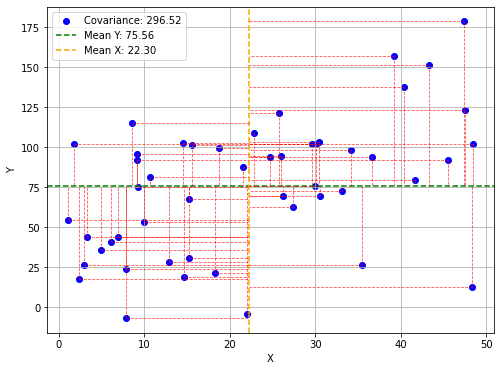

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Generate example data
np.random.seed(42)
x = np.random.rand(50)
y = 2 * x + 1 + np.random.randn(50)  # A linear relationship with some noise

x*=50
y*=40

# Calculate the Covariance
cov = np.cov(x,y)[0,1]

# Calculate the means of the two samples
mean_x = np.mean(x)
mean_y = np.mean(y)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label=f'Covariance: {cov:.2f}', color='blue')

# Plot the means as horizontal and vertical lines
plt.axhline(mean_y, color='green', linestyle='--', label=f'Mean Y: {mean_y:.2f}')
plt.axvline(mean_x, color='orange', linestyle='--', label=f'Mean X: {mean_x:.2f}')

# Add line segments from data points to the respective mean lines
for i in range(len(x)):
    plt.plot([x[i], mean_x], [y[i], y[i]], 'r--', linewidth=0.8, alpha=0.7)
    plt.plot([x[i], x[i]], [y[i], mean_y], 'r--', linewidth=0.8, alpha=0.7)

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')

# Show legend
plt.legend()

# Display the plot
plt.grid()
plt.show()


Il grafico mostra un campione di punti e le rispettive medie con una linea orizzontale (per Y) e verticale (per X). Le due medie dividono il grafico in quattro quadranti. Per ogni punto, le linee tratteggiate rosse indicano i valori delle grandezze $(x^{(i)}-\overline x)$ e $(y^{(i)}-\overline y)$. In particolare:
* I punti nel quadrante in alto a destra avranno entrambe queste grandezze positive. I prodotti $(x^{(i)}-\overline x)(y^{(i)}-\overline y)$ saranno positivi.
* I punti nel quadrante in basso a destra avranno entrambe queste grandezze negative. I prodotti $(x^{(i)}-\overline x)(y^{(i)}-\overline y)$ saranno positivi.
* I punti negli altri due quadranti avranno una delle grandezze positive e l'altra negativa. I prodotti $(x^{(i)}-\overline x)(y^{(i)}-\overline y)$ saranno negativi.

In pratica:
* i punti nel primo e terzo quadrante contribuiscono **positivamente** all'indice di correlazione;
* i punti nel secondo e quarto quadrante contribuiscono **negativamente** all'indice di correlazione.
* I punti vicini alla media (l'intersezione tra le due medie) corrisponderanno a grandezze molto piccole e **non contribuiranno** a cambiare il valore della covarianza.

Intuitivamente, la covarianza assumerà valori molto positivi quando $X$ e $Y$ variano in maniera concorde (ovvero, se $X$ assume valori alti, $Y$ assume valori alti e se $X$ assume valori bassi $Y$ assume valori bassi). In tal caso infatti i segni dei due fattori all'interno della sommatoria saranno concordi e il loro prodotto avrà segno positivo. Se invece $X$ e $Y$ variano in maniera discorde, il prodotto avrà segno negativo e la varianza assumerà valori negativi.

Notiamo che la covarianza di una variabile $X$ con se stessa è uguale alla varianza:

$$
Cov(X,X) = \frac{1}{n}\sum_i^n (x_i - \overline x) (x_i - \overline x) = s_X
$$


Va notato che:
* Valori negativi indicano una correlazione negativa (quando una delle due variabili cresce, l'altra diminuisce);
* Valori positivi indicano una correlazione positiva (le due variabili crescono o decrescono insieme);
* Valori nulli (o vicini allo zero) indicano che le due variabili non sono correlate (o lo sono debolmente).

Va anche notato che i valori della correlazione non sono normalizzati e dipendono dai range delle singole variabili, per cui non è possibile confrontare le covarianze. Ad esempio, la covarianza tra `relwt` e se stessa (dunque la varianza di `relwt`) è prossima allo zero, tuttavia, ciò non vuol dire che `relwt` non sia correlata con se stessa!

In pratica, in presenza di più variabili, si calcolano le covarianze di tutte le coppie possibili di variabili, un po' come visto nel caso della scatter matrix. Nel nostro caso avremo:

In [37]:
data.cov()

,relwt,glufast,glutest,instest,sspg
relwt,0.016702,-0.072815,0.982426,3.473373,5.266255
glufast,-0.072815,4087.097031,19546.064080,-3063.463649,4849.905651
glutest,0.982426,19546.064080,100457.849808,-12918.162739,25908.490182
instest,3.473373,-3063.463649,-12918.162739,14625.312548,101.482519
sspg,5.266255,4849.905651,25908.490182,101.482519,11242.331897


La matrice vista sopra viene anche detta "matrice di covarianza" e indicata con la lettere $\Sigma$. Date le variabili $X=(X_i,\ldots,X_k)$, $\Sigma$ è una matrice $[k \times k]$ il cui termine generale è:

$$\Sigma_{ij} = Cov(X_i,X_j)$$

### Indice di Correlazione di Pearson

Il coefficiente di correlazione di Pearson cerca di risolvere i problemi della covarianza fornendo uno score quantitativo normalizzato. Dato un campione bivariato $\{(x^{(i)},y^{(i)})\}$, il coefficiente di correlazione di Pearson è definito come la covarianza tra le due variabili, diviso il prodotto delle deviazioni standard:

$$
\rho(x,y)= \frac{Cov(X,Y)}{s_X s_Y} 
$$

Notiamo che:

$$
 \rho(x,y) = \frac{Cov(X,Y)}{s_X s_Y}  = \frac{1}{n} \sum \frac{(x_i - \overline x)}{s_X} \frac{(y_i - \overline y)}{s_X} = Cov(z(X),z(Y))
$$

Dove

$$
z(X) = \frac{X-\overline X}{s_x}
$$

è la funzione di z-scoring.

Possiamo dunque vedere l'indice di correlazione di Pearson come la covarianza delle variabili normalizzate con z-scoring. Si può facilmente vedere che il coefficiente di correlazione di Pearson può essere scritto anche come segue:

$$
\rho(x,y) = \frac{\sum_{i=1}^n (x^{(i)}-\overline x)(y^{(i)}-\overline y)}{\sqrt{\sum_{i=1}^n (x^{(i)}-\overline x)^2} \sqrt{\sum_{i=1}^n (y^{(i)}-\overline y)^2}}
$$

Dove $\overline x$ e $\overline y$ sono rispettivamente le medie dei valori delle due variabili.

Il grafico che segue mostra un plot analogo al precedente dopo aver effettuato lo z-scoring. Si noti come adesso i range di $x$ e $y$ sono normalizzati e la media si trova nell'origine.

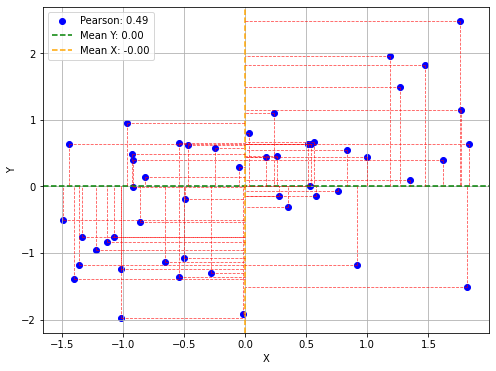

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, zscore

# Generate example data
np.random.seed(42)
x = np.random.rand(50)
y = 2 * x + 1 + np.random.randn(50)  # A linear relationship with some noise

x = zscore(x)
y = zscore(y)

# Calculate the Covariance
#cov = np.cov(x,y)[0,1]
cov = pearsonr(x,y)[0]

# Calculate the means of the two samples
mean_x = np.mean(x)
mean_y = np.mean(y)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label=f'Pearson: {cov:.2f}', color='blue')

# Plot the means as horizontal and vertical lines
plt.axhline(mean_y, color='green', linestyle='--', label=f'Mean Y: {mean_y:.2f}')
plt.axvline(mean_x, color='orange', linestyle='--', label=f'Mean X: {mean_x:.2f}')

# Add line segments from data points to the respective mean lines
for i in range(len(x)):
    plt.plot([x[i], mean_x], [y[i], y[i]], 'r--', linewidth=0.8, alpha=0.7)
    plt.plot([x[i], x[i]], [y[i], mean_y], 'r--', linewidth=0.8, alpha=0.7)

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')

# Show legend
plt.legend()


x = zscore(x)
y = zscore(y)

# Display the plot
plt.grid()
plt.show()


L'indice di correlazione di Pearson è un numero compreso tra $-1$ (massima anticorrelazione) e $1$ (massima correlazione).

In pratica, si avrà:
* $\rho(x,-x)=-1$
* $\rho(x,x) = 1$

L'indice di correlazione tra le variabili `relwt` e `sspg` sarà pari a:

In [40]:
from scipy.stats import pearsonr
print(f"{pearsonr(data['relwt'], data['sspg'])[0]:0.2f}")


0.38


#### Interpretazione dei valori dell'indice di correlazione di Pearson
L'indice di correlazione di Pearson è un numero compreso tra $-1$ e $1$ che indica se sussiste una correlazione (ovvero, quando i valori della prima variabile crescono, anche i valori della seconda variabile crescono) o un'anticorrelazione (ovvero, quando i valori della prima variabile crescono, i valori della seconda variabile decrescono e viceversa). Valori prossimi a $-1$ indicano che le variabili sono anticorrelate; valori prossimi a $1$ indicano che le variabili sono correlate; valori prossimi a $0$ indicano che le variabili sono decorrelate. In pratica:
 * Il segno dell'indice indica il "verso" della correlazione:
   * Positivo: le variabili sono correlate;
   * Negativo: le variabili sono anticorrelate;
 * Il valore assoluto dell'indice indica quanto la correlazione (o anticorrelazione) sia forte:
   * per valori compresi tra $0$ e $0.3$ si parla di correlazione (o anticorrelazione) **debole**;
   * per valori compresi tra $0.3$ e $0.7$ si parla di correlazione (o anticorrelazione) **moderata**;
   * per valori compresi tra $0.7$ e $1$ si parla di correlazione (o anticorrelazione) **forte**.

Si noti che l'indice di correlazione di Pearson misura solo le **correlazioni lineari**. Pertanto, tra due variabili potrebbe sussistere una correlazione non lineare anche se l'indice di correlazione ottenuto è basso. 

Il seguente grafico mostra gli scatterplot di alcuni campioni bivariati di esempio con diversi gradi di correlazione, insieme ai relativi indici di correlazione di Pearson:

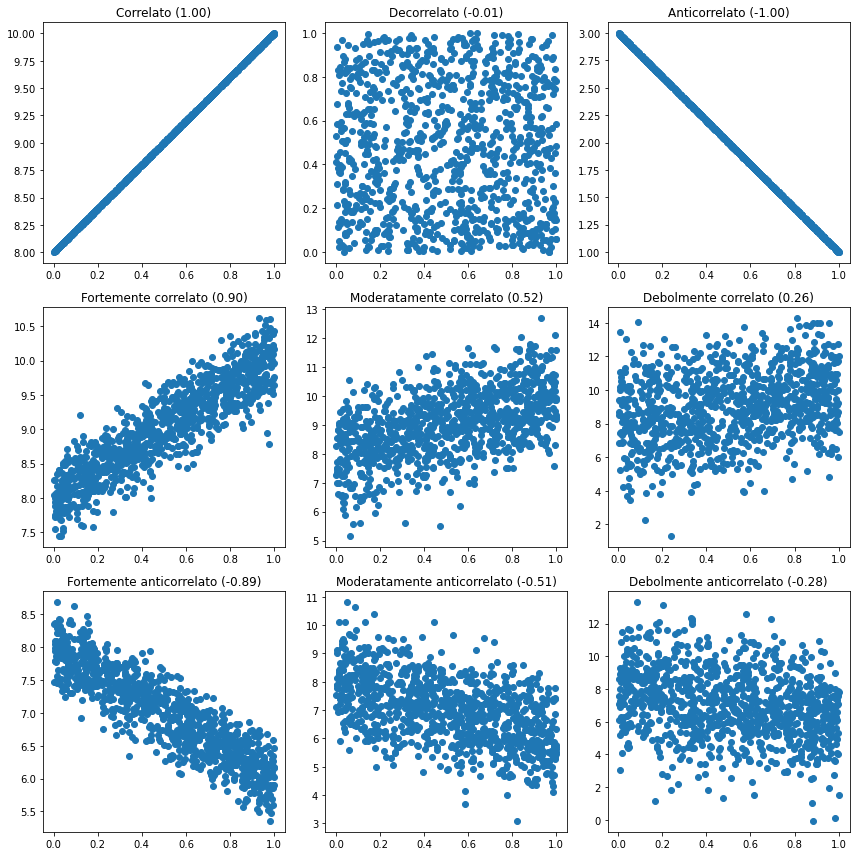

In [41]:
import numpy as np
import pandas as pd
np.random.seed(1234)

x = np.random.rand(1000)
y = np.random.rand(1000)

campione_decorrelato = pd.DataFrame({'x':x,'y':y})

campione_correlato = pd.DataFrame({'x':x,'y':2*x+8})
campione_anticorrelato = pd.DataFrame({'x':x,'y':-2*x+3})

campione_fortemente_correlato =  pd.DataFrame({'x':x,'y':2*x+8+np.random.normal(0,0.3,1000)})
campione_fortemente_anticorrelato =  pd.DataFrame({'x':x,'y':-2*x+8+np.random.normal(0,0.3,1000)})

campione_moderatamente_correlato =  pd.DataFrame({'x':x,'y':2*x+8+np.random.normal(0,1,1000)})
campione_moderatamente_anticorrelato =  pd.DataFrame({'x':x,'y':-2*x+8+np.random.normal(0,1,1000)})

campione_debolmente_correlato =  pd.DataFrame({'x':x,'y':2*x+8+np.random.normal(0,2,1000)})
campione_debolmente_anticorrelato =  pd.DataFrame({'x':x,'y':-2*x+8+np.random.normal(0,2,1000)})

plt.figure(figsize=(12,12))
plt.subplot(331)
s=campione_correlato
plt.scatter(s['x'],s['y'])
plt.title("Correlato (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(332)
s=campione_decorrelato
plt.scatter(s['x'],s['y'])
plt.title("Decorrelato (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(333)
s=campione_anticorrelato
plt.scatter(s['x'],s['y'])
plt.title("Anticorrelato (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(334)
s=campione_fortemente_correlato
plt.scatter(s['x'],s['y'])
plt.title("Fortemente correlato (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(335)
s=campione_moderatamente_correlato
plt.scatter(s['x'],s['y'])
plt.title("Moderatamente correlato (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(336)
s=campione_debolmente_correlato
plt.scatter(s['x'],s['y'])
plt.title("Debolmente correlato (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(337)
s=campione_fortemente_anticorrelato
plt.scatter(s['x'],s['y'])
plt.title("Fortemente anticorrelato (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(338)
s=campione_moderatamente_anticorrelato
plt.scatter(s['x'],s['y'])
plt.title("Moderatamente anticorrelato (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(339)
s=campione_debolmente_anticorrelato
plt.scatter(s['x'],s['y'])
plt.title("Debolmente anticorrelato (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.tight_layout()

plt.show()

Osservando i grafici mostrati sopra, possiamo notare che sussistono le seguenti relazioni tra indice e scatterplot:
 * Un indice positivo individua un andamento ascendente (una retta con coefficiente angolare positivo);
 * Un indice negativo individua un andamento discendente (una retta con coefficiente angolare negativo);
 * Il valore assoluto dell'indice è correlato alla "larghezza" del "corridoio" formato dai dati.
 
Si noti che non esiste alcuna relazione tra indice di correlazione di Pearson e pendenza della retta. Possiamo vederlo nel seguente grafico:

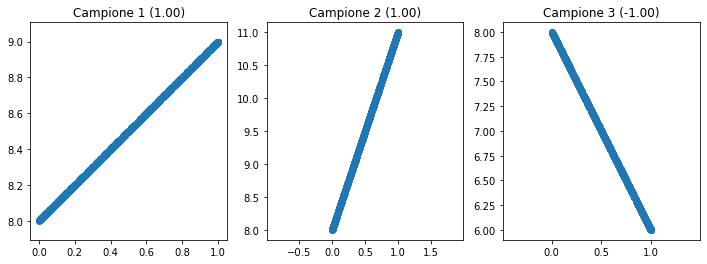

In [42]:
campione1 =  pd.DataFrame({'x':x,'y':x+8})
campione2 =  pd.DataFrame({'x':x,'y':3*x+8})
campione3 =  pd.DataFrame({'x':x,'y':-2*x+8})

plt.figure(figsize=(12,4))
plt.subplot(131)
s=campione1
plt.scatter(s['x'],s['y'])
plt.axis('equal')
plt.title("Campione 1 (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(132)
s=campione2
plt.scatter(s['x'],s['y'])
plt.axis('equal')
plt.title("Campione 2 (%0.2f)"%pearsonr(s['x'],s['y'])[0])

plt.subplot(133)
s=campione3
plt.scatter(s['x'],s['y'])
plt.axis('equal')
plt.title("Campione 3 (%0.2f)"%pearsonr(s['x'],s['y'])[0])
plt.show()

### Indice di Correlazione di Spearman per ranghi

L'indice di Pearson cattura le relazioni lineari tra le variabili. Esistono tuttavia dei casi in cui la relazione tra due variabili può non essere lineare, ma ha comunque senso cercare di capire se esiste una correlazione. 

Immaginiamo di avere una serie di utenti che assegnano dei punteggi a dei prodotti che recensiscono. Ogni utente userà una scala soggettiva diversa e probabilmente non lineare. L'indice di correlazione di Pearson non sarebbe il più adeguato per verificare se i punteggi assegnati da due utenti sono correlati. 

**L'indice di correlazione di Spearman cerca di risolvere questo problema passando dai punteggi ai ranghi**. Invece di ragionare sui punteggi individuali, l'indice di correlazione di Spearman ordina i prodotti per score e verifica se gli ordinamenti ottenuti sono simili. 

Consideriamo il campione $\{(x^{(i)},y^{(i)})\}_i$. Siano $R(x^{(i)})$ e $R(y^{(i)})$ i ranghi associati ai valori delle due variabili e sia $d_i=R(x^{(i)})$ - $R(y^{(i)})$. Il coefficiente di correlazione di Spearman per ranghi è definito come segue:

$$ R = 1 - \frac{6\sum_{i=1}^n d_i^2}{n(n^2-1)} $$

I valori del coefficiente di Spearman sono normalizzati tra $-1$ e $+1$ e hanno una interpretazione simile al coefficiente di Pearson.

Consideriamo il seguente esempio. Chiediamo a Alice, Bob, Charlie e David di assegnare uno score da $1$ a $5$ a quattro gusti di gelato, ottenendo questi risultati:

In [43]:
import pandas as pd
from scipy.stats import spearmanr

# Create a DataFrame with ice cream flavor scores
data = {
    'Participant': ['Alice', 'Bob', 'Charlie', 'David'],
    'Chocolate': [5, 3, 4, 2],   # Scores out of 5
    'Vanilla': [4, 5, 3, 3],      # Scores out of 5
    'Strawberry': [3, 4, 5, 2],   # Scores out of 5
    'MintChip': [2, 2, 2, 5]      # Scores out of 5
}

df = pd.DataFrame(data)
df


,Participant,Chocolate,Vanilla,Strawberry,MintChip
0,Alice,5,4,3,2
1,Bob,3,5,4,2
2,Charlie,4,3,5,2
3,David,2,3,2,5


Dato che ogni bambino può usare una diversa scala, utilizziamo il coefficiente di Spearman ottenendo i seguenti valori:

In [44]:

# Calculate the Spearman correlation coefficients
spearman_corr_chocolate_vs_vanilla, _ = spearmanr(df['Chocolate'], df['Vanilla'])
spearman_corr_chocolate_vs_strawberry, _ = spearmanr(df['Chocolate'], df['Strawberry'])
spearman_corr_chocolate_vs_mintchip, _ = spearmanr(df['Chocolate'], df['MintChip'])

# Calculate and display the Spearman correlation coefficients
print(f"Spearman Correlation (Chocolate vs. Vanilla): {spearman_corr_chocolate_vs_vanilla:.2f}")
print(f"Spearman Correlation (Chocolate vs. Strawberry): {spearman_corr_chocolate_vs_strawberry:.2f}")
print(f"Spearman Correlation (Chocolate vs. MintChip): {spearman_corr_chocolate_vs_mintchip:.2f}")

Spearman Correlation (Chocolate vs. Vanilla): 0.21
Spearman Correlation (Chocolate vs. Strawberry): 0.40
Spearman Correlation (Chocolate vs. MintChip): -0.77


Questi valori ci dicono che il gusto di gelati che ha ricevuto score "più simili" al cioccolato è la fragola.

A differenza del coefficiente di Pearson, l'indice di Spearman può catturare relazioni non lineari, come mostrato nell'esempio che segue:

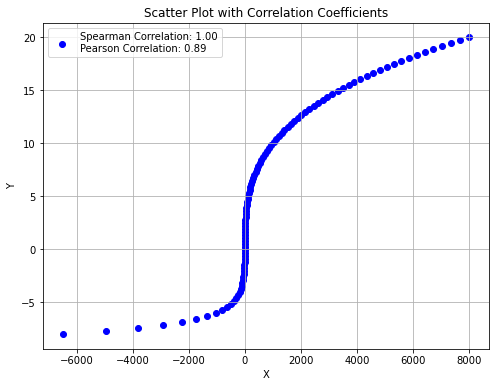

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr

# Generate non-linear data
np.random.seed(42)
x = np.linspace(-8, 20, 100)
#y = x**2 + np.random.randn(50)  # A non-linear relationship with some noise
y = x**3-2*(1+np.exp(-x)) + 0.01*np.random.randn(100) 

y, x = x, y

# Calculate the Spearman and Pearson correlation coefficients
spearman_corr, _ = spearmanr(x, y)
pearson_corr, _ = pearsonr(x, y)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label=f'Spearman Correlation: {spearman_corr:.2f}\nPearson Correlation: {pearson_corr:.2f}', color='blue')

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Correlation Coefficients')

# Show legend
plt.legend()

# Display the plot
plt.grid()
plt.show()


### Indice di Correlazione di Kendall (Opzionale)

L'indice di correlazione per ranghi di Kendall, detto anche **Kendall's $\tau$**, è anch'esso usato per misurare il livello di associazione tra due variabili, considerandone i ranghi. 

Consideriamo il campione $\{(x^{(i)},y^{(i)})\}_i$. Ogni coppia di osservazioni $(x_i,y_i)$ e $(x_j,y_j)$, con $i<j$ si dice:
* **concordante** se: $x_i>x_j$ e $y_i>y_j$ o $x_i<x_j$ e $y_i<y_j$;
* **discordante** se: $x_i<x_j$ e $y_i>y_j$ o $x_i>x_j$ e $y_i<y_j$;

Il coefficiente $\tau$ di Kendall è definito come segue:

$$\tau = \frac{\text{concordant pairs} - \text{discordant pairs}}{\text{pairs}}$$

Il grafico che segue mostra un campione con sei punti. Ciascuna linea mostra una possibile coppia di punti. Le linee verdi mostrano i campioni concordanti, mentre quelle rosse mostrano i campioni discordanti. Il coefficiente di Kendall per questo esempio è dato da:

$$\tau = \frac{4-2}{6} = \frac{1}{3}$$

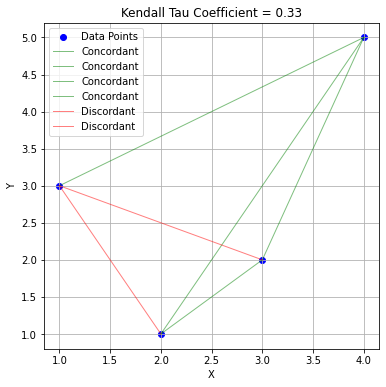

In [46]:
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Sample data
x = [1, 2, 3, 4]
y = [3, 1, 2, 5]

# Calculate Kendall tau coefficient
tau, _ = kendalltau(x, y)

# Create lists to store concordant and discordant pairs
concordant_pairs_x = []
concordant_pairs_y = []
discordant_pairs_x = []
discordant_pairs_y = []

# Determine concordant and discordant pairs
for i in range(len(x)):
    for j in range(i+1, len(y)):
        if (x[i] - x[j]) * (y[i] - y[j]) > 0:
            concordant_pairs_x.append([x[i], x[j]])
            concordant_pairs_y.append([y[i], y[j]])
        else:
            discordant_pairs_x.append([x[i], x[j]])
            discordant_pairs_y.append([y[i], y[j]])

# Create a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c='b', marker='o', label='Data Points')

# Plot concordant pairs in green
for i in range(len(concordant_pairs_x)):
    plt.plot(concordant_pairs_x[i], concordant_pairs_y[i], c='g', linestyle='-', linewidth=1, alpha=0.5, label='Concordant')

# Plot discordant pairs in red
for i in range(len(discordant_pairs_x)):
    plt.plot(discordant_pairs_x[i], discordant_pairs_y[i], c='r', linestyle='-', linewidth=1, alpha=0.5, label='Discordant')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Kendall Tau Coefficient = {tau:.2f}')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


### Matrice di Correlazione

Analogamente a quanto visto nel caso degli scatterplot, quando abbiamo più variabili, possiamo calcolare gli indici di correlazione tra tutte le variabili del dataset. Otteniamo in questo modo una "matrice di correlazione". La matrice di correlazione calcolata mediante il coefficiente di Pearson, nel caso del nostro dataset `diabetes` sarà:

In [47]:
from statsmodels.datasets import get_rdataset
data = get_rdataset('Diabetes','heplots').data
data.corr()

,relwt,glufast,glutest,instest,sspg
relwt,1.000000,-0.008813,0.023984,0.222238,0.384320
glufast,-0.008813,1.000000,0.964628,-0.396235,0.715480
glutest,0.023984,0.964628,1.000000,-0.337020,0.770942
instest,0.222238,-0.396235,-0.337020,1.000000,0.007914
sspg,0.384320,0.715480,0.770942,0.007914,1.000000


Esiste anche una rappresentazione grafica della matrice di correlazione, spesso detta "correlation plot":

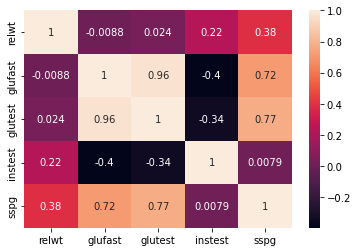

In [48]:
sns.heatmap(data.corr(), annot=True)
plt.show()

## Referenze
* Capitolo 3 di: Heumann, Christian, and Michael Schomaker Shalabh. Introduction to statistics and data analysis. Springer International Publishing Switzerland, 2016.
* https://en.wikipedia.org/wiki/Odds_ratio